In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the dataset
from google.colab import files
uploaded = files.upload()

Saving BMW_Sales_Data.csv to BMW_Sales_Data (1).csv


In [5]:
import io
import pandas as pd

In [6]:
# Automatically get the filename
filename = next(iter(uploaded))

In [7]:
# Read CSV into DataFrame
df = pd.read_csv(io.BytesIO(uploaded[filename]))

In [9]:
# Clean and prepare the DataFrame
df = df.dropna()
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])

In [10]:
# Confirm it works
print(df.head())
print(type(df))

        Date    Year         Model   Revenue  Quantity Sold         Region  \
0 2019-01-01  2019.0        BMW X2   94654.0            2.0         Africa   
1 2019-01-01  2019.0        BMW M4  111259.0            1.0         Africa   
2 2019-02-01  2019.0  BMW 6 Series   94881.0            3.0  South America   
3 2019-04-01  2019.0        BMW X2   35293.0            4.0           Asia   
4 2019-04-01  2019.0        BMW M2   76275.0            5.0           Asia   

       Country    Channel  
0      Nigeria  Wholesale  
1        Kenya  Wholesale  
2        Chile  Wholesale  
3  South Korea  Wholesale  
4        Japan  Wholesale  
<class 'pandas.core.frame.DataFrame'>


# Political Analysis

<ipython-input-12-1838623954>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=region_revenue.values, y=region_revenue.index, palette="viridis")


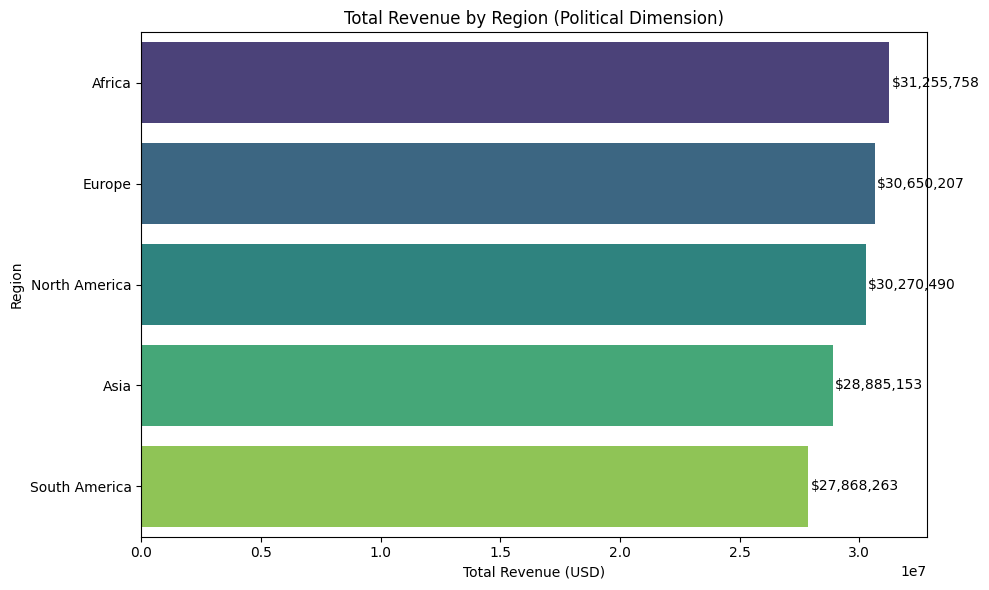

In [12]:
# Revenue by Region
region_revenue = df.groupby("Region")["Revenue"].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=region_revenue.values, y=region_revenue.index, palette="viridis")

# Add data labels to each bar
for index, value in enumerate(region_revenue.values):
    plt.text(value + 100000, index, f"${int(value):,}", va='center')

plt.title("Total Revenue by Region (Political Dimension)")
plt.xlabel("Total Revenue (USD)")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

# Economic Analysis

<ipython-input-13-3724012151>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  country_avg_price = df.groupby("Country").apply(lambda x: x["Revenue"].sum() / x["Quantity Sold"].sum())
<ipython-input-13-3724012151>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=country_avg_price.values, y=country_avg_price.index, palette="magma")


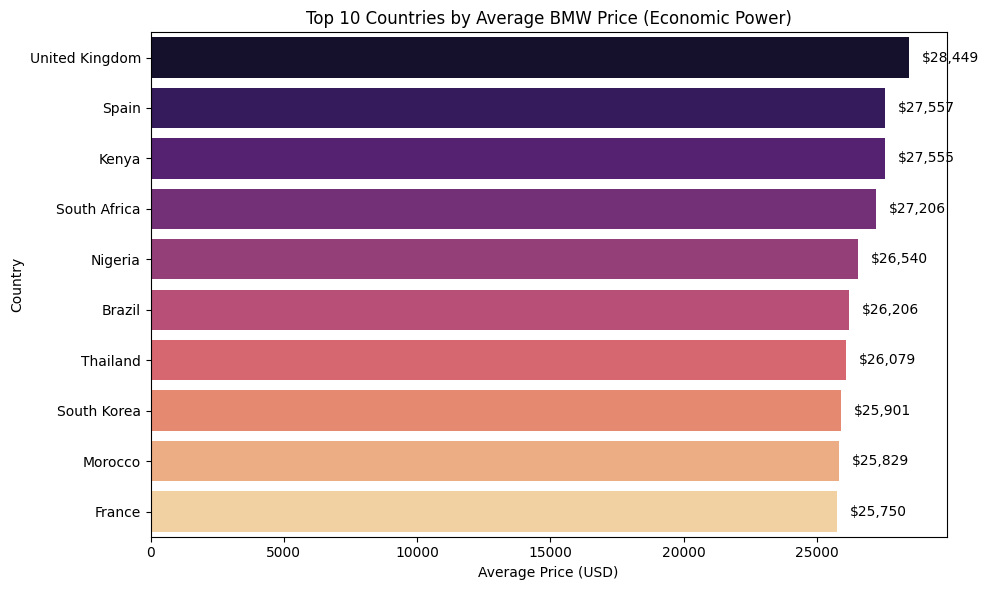

In [13]:
# Average Price per Country
country_avg_price = df.groupby("Country").apply(lambda x: x["Revenue"].sum() / x["Quantity Sold"].sum())
country_avg_price = country_avg_price.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=country_avg_price.values, y=country_avg_price.index, palette="magma")

# Add data labels
for index, value in enumerate(country_avg_price.values):
    plt.text(value + 500, index, f"${int(value):,}", va='center')

plt.title("Top 10 Countries by Average BMW Price (Economic Power)")
plt.xlabel("Average Price (USD)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

# Social Analysis

<ipython-input-14-1130014913>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=ev_revenue_by_region.values, y=ev_revenue_by_region.index, palette="Blues_d")


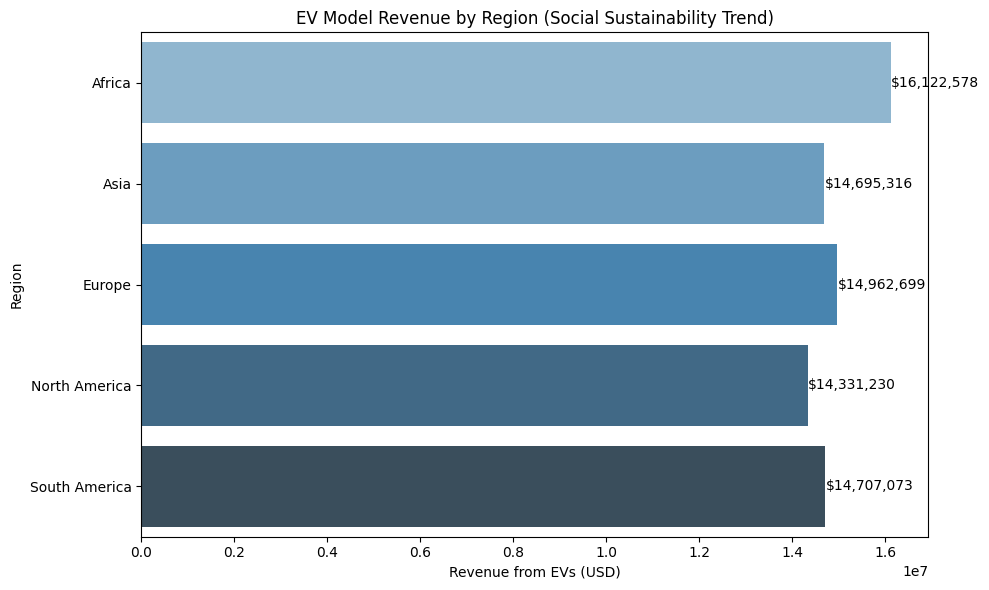

In [14]:
# EV Revenue by Region
ev_models = df[df['Model'].str.contains("i", case=False)]  # EVs like i3, i8
ev_revenue_by_region = ev_models.groupby("Region")["Revenue"].sum()

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=ev_revenue_by_region.values, y=ev_revenue_by_region.index, palette="Blues_d")

# Add data labels
for index, value in enumerate(ev_revenue_by_region.values):
    plt.text(value + 10000, index, f"${int(value):,}", va='center')

plt.title("EV Model Revenue by Region (Social Sustainability Trend)")
plt.xlabel("Revenue from EVs (USD)")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

# Technological Analysis

<ipython-input-15-3018529618>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=top_models.values, y=top_models.index, palette="coolwarm")


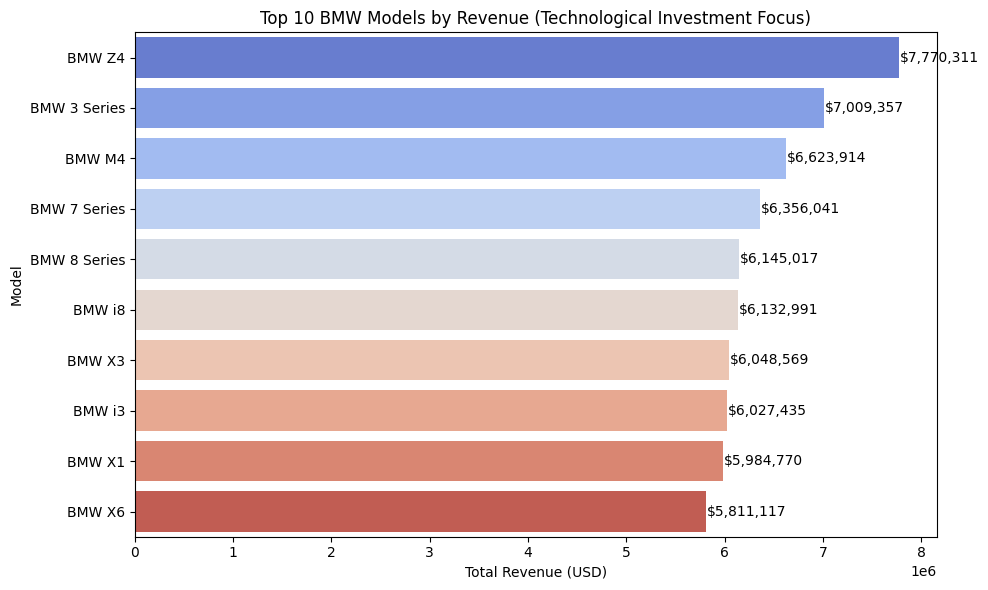

In [15]:
# Top Models by Revenue
top_models = df.groupby("Model")["Revenue"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=top_models.values, y=top_models.index, palette="coolwarm")

# Add data labels
for index, value in enumerate(top_models.values):
    plt.text(value + 10000, index, f"${int(value):,}", va='center')

plt.title("Top 10 BMW Models by Revenue (Technological Investment Focus)")
plt.xlabel("Total Revenue (USD)")
plt.ylabel("Model")
plt.tight_layout()
plt.show()


# Environmental Analysis

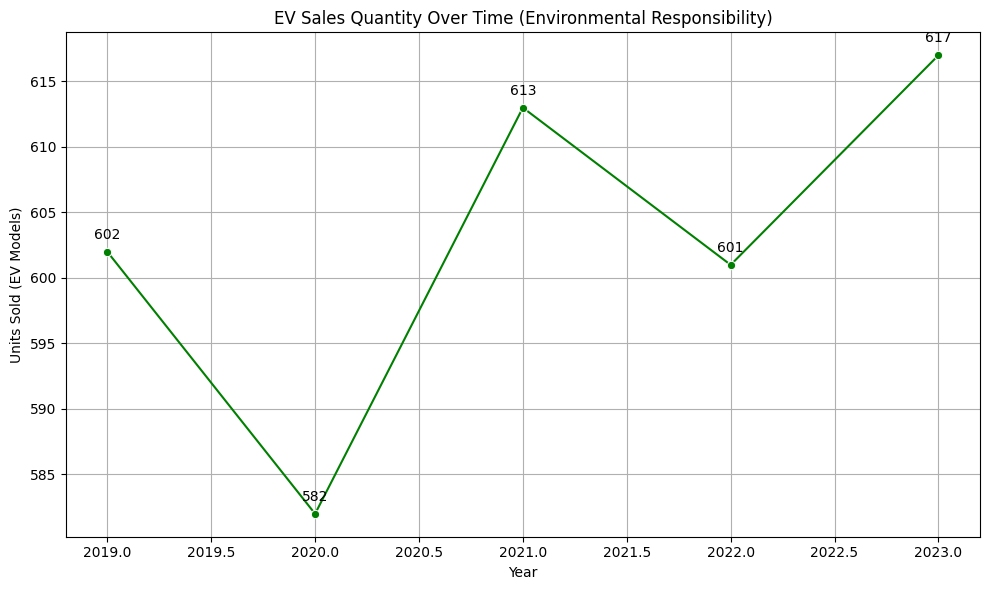

In [17]:
# EV Sales Over Time
ev_sales_by_year = ev_models.groupby(ev_models['Date'].dt.year)['Quantity Sold'].sum()

plt.figure(figsize=(10, 6))
sns.lineplot(x=ev_sales_by_year.index, y=ev_sales_by_year.values, marker='o', color='green')

# Add data labels to each point
for x, y in zip(ev_sales_by_year.index, ev_sales_by_year.values):
    plt.text(x, y + 1, f"{int(y):,}", ha='center', fontsize=10)

plt.title("EV Sales Quantity Over Time (Environmental Responsibility)")
plt.xlabel("Year")
plt.ylabel("Units Sold (EV Models)")
plt.grid(True)
plt.tight_layout()
plt.show()


# Legal Analysis

<ipython-input-18-3130507422>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_country_diversity.values, y=region_country_diversity.index, palette="Set2")


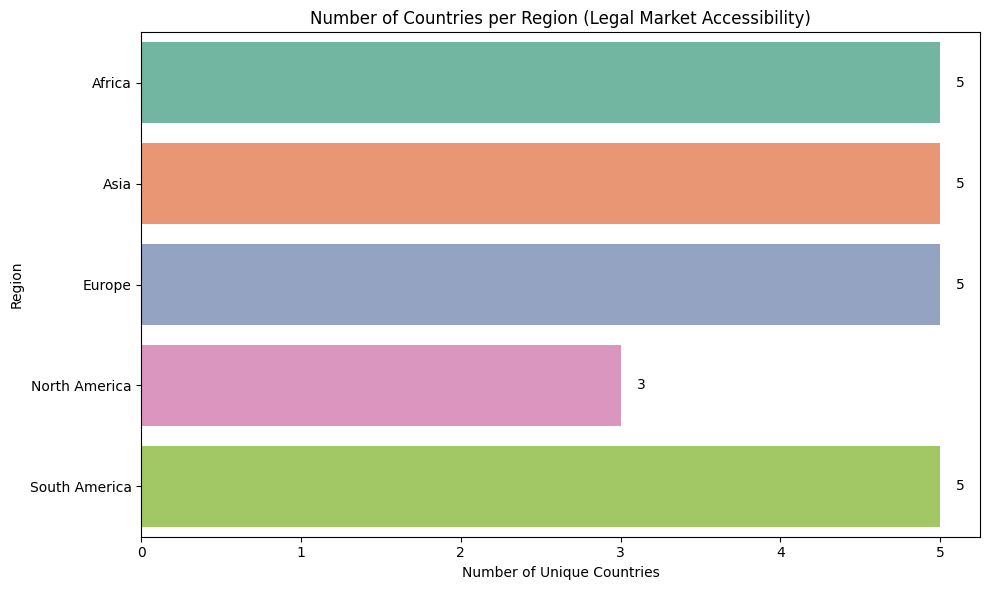

In [18]:
# Country Diversity by Region
region_country_diversity = df.groupby('Region')['Country'].nunique()

plt.figure(figsize=(10, 6))
sns.barplot(x=region_country_diversity.values, y=region_country_diversity.index, palette="Set2")

# Add data labels
for index, value in enumerate(region_country_diversity.values):
    plt.text(value + 0.1, index, f"{int(value)}", va='center')

plt.title("Number of Countries per Region (Legal Market Accessibility)")
plt.xlabel("Number of Unique Countries")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

# Advanced Analysis – Correlation & Pricing Trend

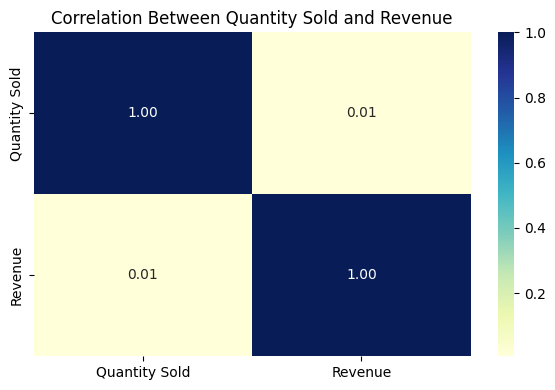

In [19]:
df['Year'] = df['Date'].dt.year
df['Revenue_per_Unit'] = df['Revenue'] / df['Quantity Sold']
correlation = df[['Quantity Sold', 'Revenue']].corr()
avg_revenue_per_year = df.groupby('Year')['Revenue_per_Unit'].mean()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Correlation Between Quantity Sold and Revenue")
plt.tight_layout()
plt.show()

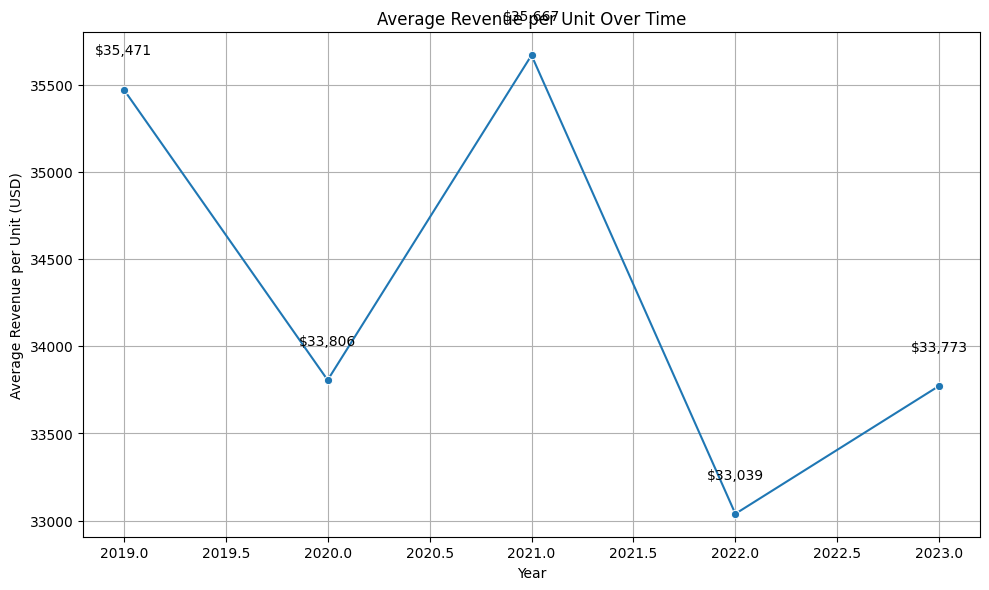

In [20]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=avg_revenue_per_year.index, y=avg_revenue_per_year.values, marker='o')
for x, y in zip(avg_revenue_per_year.index, avg_revenue_per_year.values):
    plt.text(x, y + 200, f"${int(y):,}", ha='center')
plt.title("Average Revenue per Unit Over Time")
plt.xlabel("Year")
plt.ylabel("Average Revenue per Unit (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Revenue by Model and Year

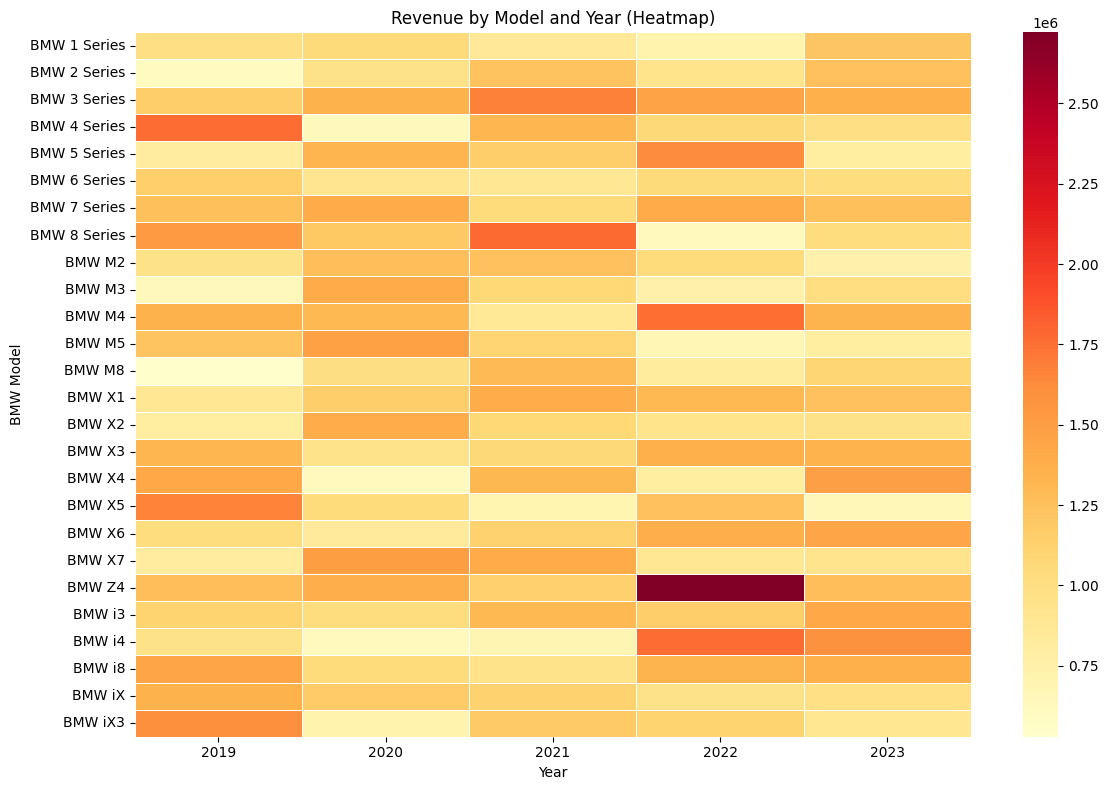

In [21]:
model_year_revenue = df.pivot_table(values='Revenue', index='Model', columns='Year', aggfunc='sum').fillna(0)
plt.figure(figsize=(12, 8))
sns.heatmap(model_year_revenue, cmap="YlOrRd", annot=False, linewidths=.5)
plt.title("Revenue by Model and Year (Heatmap)")
plt.xlabel("Year")
plt.ylabel("BMW Model")
plt.tight_layout()
plt.show()

# Forecasting – Monthly Revenue ARIMA

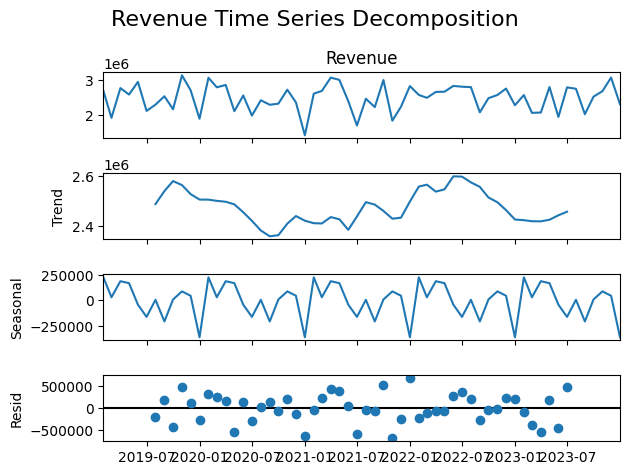

In [22]:
# Make sure this import is at the top
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Use 'ME' instead of deprecated 'M'
monthly_revenue = df.set_index('Date').resample('ME')['Revenue'].sum()

# Decompose the time series
decomposition = seasonal_decompose(monthly_revenue, model='additive', period=12)
decomposition.plot()
plt.suptitle("Revenue Time Series Decomposition", fontsize=16)
plt.tight_layout()
plt.show()

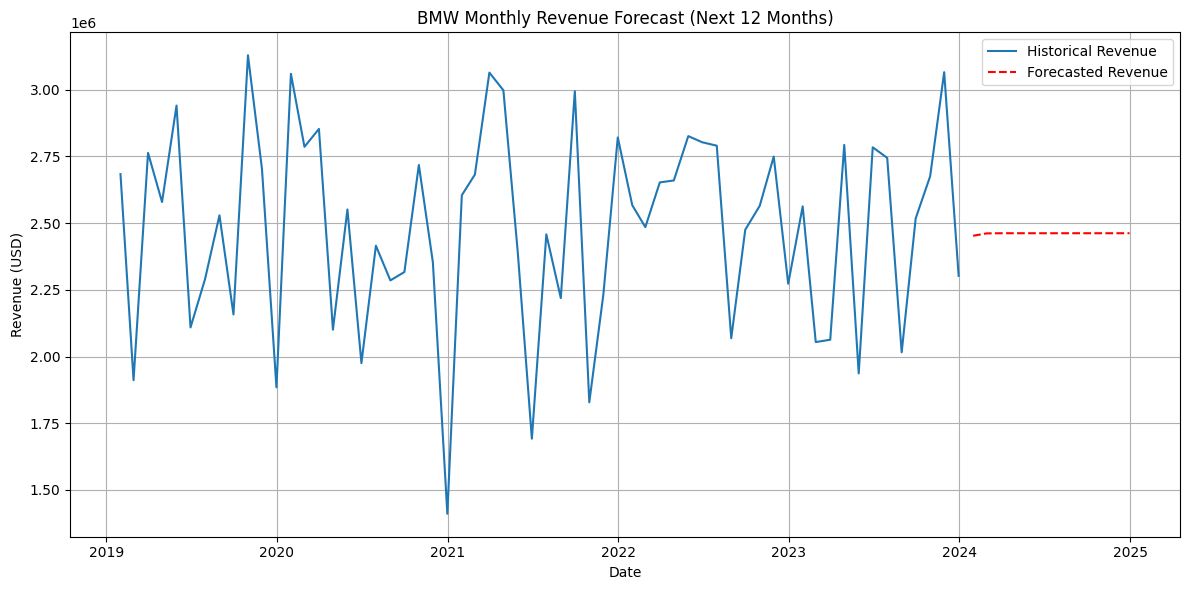

In [23]:
# ARIMA forecasting
model = ARIMA(monthly_revenue, order=(1, 1, 1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=12)

# Plot forecast
plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue, label='Historical Revenue')
plt.plot(forecast.index, forecast.values, label='Forecasted Revenue', linestyle='--', color='red')
plt.title("BMW Monthly Revenue Forecast (Next 12 Months)")
plt.xlabel("Date")
plt.ylabel("Revenue (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Hypothesis : The introduction of Electric Vehicles (EVs) in the BMW lineup leads to a significant increase in revenue, particularly in regions with stronger environmental regulations and consumer awareness

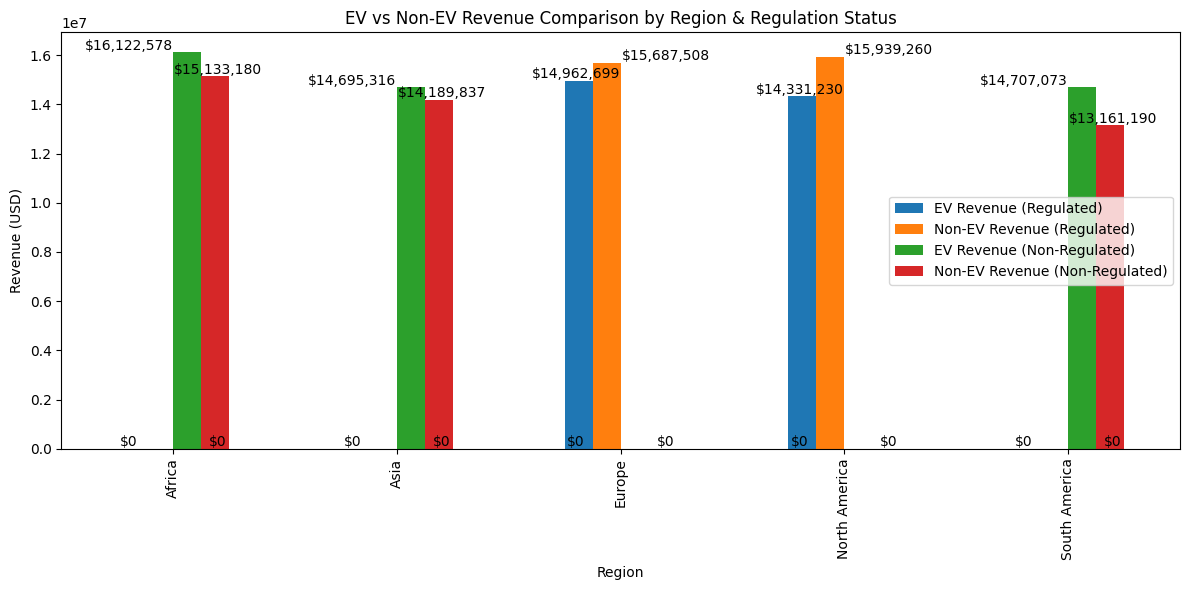

In [27]:
# Step 1: Visualizing EV Revenue vs Non-EV Revenue by Region & Regulations
# EV Models
ev_models = df[df['Model'].str.contains("i", case=False)]  # EVs (e.g., i3, i8)

# Non-EV Models
non_ev_models = df[~df['Model'].str.contains("i", case=False)]  # Non-EVs

# Let's assume stronger regulations exist in regions like 'Europe', 'North America'
regulated_regions = ['Europe', 'North America']
df['Is_Regulated_Region'] = df['Region'].apply(lambda x: 1 if x in regulated_regions else 0)

# Grouping revenue by region for both EV and non-EV models (with regulation classification)
ev_revenue_by_region = ev_models.groupby(['Region', 'Is_Regulated_Region'])['Revenue'].sum().unstack().fillna(0)
non_ev_revenue_by_region = non_ev_models.groupby(['Region', 'Is_Regulated_Region'])['Revenue'].sum().unstack().fillna(0)

# Merging data for comparison
region_revenue_comparison = pd.DataFrame({
    'EV Revenue (Regulated)': ev_revenue_by_region[1],
    'Non-EV Revenue (Regulated)': non_ev_revenue_by_region[1],
    'EV Revenue (Non-Regulated)': ev_revenue_by_region[0],
    'Non-EV Revenue (Non-Regulated)': non_ev_revenue_by_region[0]
}).fillna(0)

# Plotting the comparison of EV vs Non-EV revenue by region and regulation status
region_revenue_comparison.plot(kind='bar', figsize=(12, 6))
plt.title("EV vs Non-EV Revenue Comparison by Region & Regulation Status")
plt.xlabel("Region")
plt.ylabel("Revenue (USD)")

# Add data labels to the bars
for index, value in enumerate(region_revenue_comparison['EV Revenue (Regulated)']):
    plt.text(index - 0.2, value + 100000, f"${int(value):,}", ha='center', fontsize=10)
for index, value in enumerate(region_revenue_comparison['Non-EV Revenue (Regulated)']):
    plt.text(index + 0.2, value + 100000, f"${int(value):,}", ha='center', fontsize=10)
for index, value in enumerate(region_revenue_comparison['EV Revenue (Non-Regulated)']):
    plt.text(index - 0.2, value + 100000, f"${int(value):,}", ha='center', fontsize=10)
for index, value in enumerate(region_revenue_comparison['Non-EV Revenue (Non-Regulated)']):
    plt.text(index + 0.2, value + 100000, f"${int(value):,}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# Step 2: Statistical Testing - T-test for EV vs Non
